In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

In [2]:
# data = pd.read_csv("PK COVID-19. (27).csv")

In [3]:
import os
os.listdir()

['housing.names',
 'untitled.txt',
 'archive_8.zip',
 'HOUSE PREDICTION .ipynb',
 'House_Prediction_Joplib',
 'MODEL USAGE.ipynb',
 'IMAGE Data.ipynb',
 'Image_Classification_Joplib',
 'IMAGE Classification.ipynb',
 'PK_Covid.csv',
 '.ipynb_checkpoints',
 'KAGGLE Practics',
 'Data.csv',
 'Data -Missing values.csv',
 'CSV Files',
 'Target Projects',
 'GTALK.csv',
 '__MACOSX',
 'Zfone.csv',
 'Indestries                            37081.csv',
 'trade.csv',
 '02     AL(C&R)             Support Vector classifior.ipynb',
 'download.png',
 '01   AL(C&R)            RandomForestRegressor  & C.ipynb',
 '07       AL(LogictsReg)              Model(L.G0) with Over_sampling.ipynb',
 '03      AL(C&R)           DecisiontreeClassfication and Regrassor.ipynb',
 '04     AL(Reg)            ML 1st    PROECT(1).ipynb',
 '05       AL(Reg)      Covid project of Pakistan.ipynb',
 '03     AL     NaiveBase (AL).ipynb']

In [4]:
data = pd.read_csv("PK_Covid.csv", parse_dates = ["Date"], dayfirst = True)
data.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2020-02-26,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2020-02-26,2,0,0,Iran/Taftan,Sindh,Karachi
2,2020-02-29,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2020-02-29,1,0,0,Iran/Taftan,Sindh,Karachi
4,2020-02-03,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit


In [5]:
data.shape

(2798, 7)

In [6]:
data.isnull().sum()

Date               0
Cases              0
Deaths             0
Recovered          0
Travel_history    36
Province           0
City               0
dtype: int64

In [7]:
data.iloc[:25][0:]

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2020-02-26,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2020-02-26,2,0,0,Iran/Taftan,Sindh,Karachi
2,2020-02-29,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2020-02-29,1,0,0,Iran/Taftan,Sindh,Karachi
4,2020-02-03,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit
5,2020-06-03,0,0,1,Unknown,Sindh,Karachi
6,2020-07-03,1,0,0,Iran/Taftan,Sindh,Karachi
7,2020-09-03,6,0,0,Syria,Sindh,Karachi
8,2020-09-03,3,0,0,UK,Sindh,Karachi
9,2020-10-03,1,0,0,Iran/Taftan,Baluchistan,Quetta


In [8]:
data["Deaths"].value_counts()

0     2354
1      228
2       58
3       30
4       24
5       21
8       15
9       12
7       10
12       7
6        5
11       4
14       4
13       4
16       3
10       2
15       2
30       2
22       2
29       2
19       1
43       1
36       1
31       1
27       1
23       1
35       1
18       1
37       1
Name: Deaths, dtype: int64

In [9]:
data.drop('Travel_history', axis = 1, inplace = True)

In [10]:
data.head()

,Date,Cases,Deaths,Recovered,Province,City
0,2020-02-26,1,0,0,Islamabad Capital Territory,Islamabad
1,2020-02-26,2,0,0,Sindh,Karachi
2,2020-02-29,1,0,0,Islamabad Capital Territory,Islamabad
3,2020-02-29,1,0,0,Sindh,Karachi
4,2020-02-03,1,0,0,Gilgit-Baltistan,Gilgit


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2798 non-null   datetime64[ns]
 1   Cases      2798 non-null   int64         
 2   Deaths     2798 non-null   int64         
 3   Recovered  2798 non-null   int64         
 4   Province   2798 non-null   object        
 5   City       2798 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 131.3+ KB


In [12]:
data.shape

(2798, 6)

In [13]:
data['Province'].value_counts()

Khyber Pakhtunkhwa                    1489
Sindh                                  529
Punjab                                 341
Gilgit-Baltistan                       190
Baluchistan                             83
Azad Jummu Kashmir                      54
Islamabad Capital Territory             51
Federal Administration Tribal Area      36
islamabad Capital Territory             23
khyber Pakhtunkhwa                       2
Name: Province, dtype: int64

In [14]:
data.describe()

,Cases,Deaths,Recovered
count,2798.000000,2798.000000,2798.000000
mean,30.016440,0.617584,8.847034
std,128.861666,2.716284,61.362566
min,0.000000,0.000000,-2.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,9.000000,0.000000,1.000000
max,1639.000000,43.000000,1431.000000


In [15]:
data.tail()

,Date,Cases,Deaths,Recovered,Province,City
2793,2020-05-30,952,36,394,Punjab,Lahore
2794,2020-05-31,1184,22,120,Punjab,Lahore
2795,2020-01-06,1610,43,95,Punjab,Lahore
2796,2020-02-06,1639,30,353,Punjab,Lahore
2797,2020-03-06,1615,37,243,Punjab,Lahore


In [16]:
max_c = data.sort_values(by = 'Cases', ascending = False)
max_c.head()

,Date,Cases,Deaths,Recovered,Province,City
2796,2020-02-06,1639,30,353,Punjab,Lahore
2797,2020-03-06,1615,37,243,Punjab,Lahore
2795,2020-01-06,1610,43,95,Punjab,Lahore
2719,2020-03-06,1487,27,364,Sindh,Karachi
2608,2020-01-06,1402,22,780,Sindh,Karachi


In [17]:
last_date = data[data.Date == "2020-02-06"]
last_date

,Date,Cases,Deaths,Recovered,Province,City
2609,2020-02-06,295,4,230,Islamabad Capital Territory,Islamabad
2610,2020-02-06,2,0,0,Gilgit-Baltistan,Ghizer
2611,2020-02-06,2,0,0,Gilgit-Baltistan,Hunza
2612,2020-02-06,1,0,0,Gilgit-Baltistan,Shigar
2613,2020-02-06,15,0,0,Gilgit-Baltistan,Astore
...,...,...,...,...,...,...
2675,2020-02-06,3,0,4,Sindh,Jacobabad
2676,2020-02-06,7,0,0,Sindh,Other
2760,2020-02-06,13,1,0,Azad Jummu Kashmir,Muzaffarabad
2778,2020-02-06,405,0,168,Baluchistan,Quetta


In [18]:
max_case = last_date.sort_values(by = 'Cases',ascending = False)

In [19]:
top_max_c = max_case.head()
top_max_c

,Date,Cases,Deaths,Recovered,Province,City
2796,2020-02-06,1639,30,353,Punjab,Lahore
2652,2020-02-06,1149,23,948,Sindh,Karachi
2778,2020-02-06,405,0,168,Baluchistan,Quetta
2609,2020-02-06,295,4,230,Islamabad Capital Territory,Islamabad
2617,2020-02-06,174,3,13,Khyber Pakhtunkhwa,Peshawar


In [20]:
# sns.barplot(x = 'City', y = 'Cases', data = top_max_c, hue = 'City')
# plt.show()

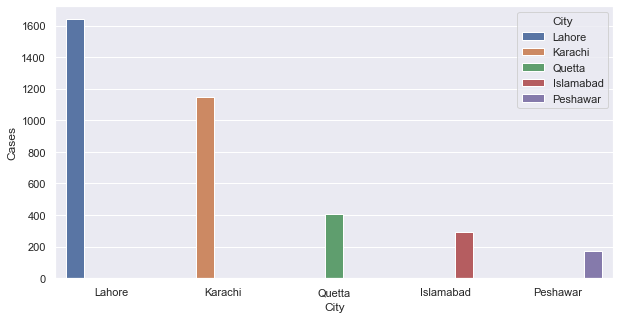

In [21]:
sns.set(rc = {"figure.figsize": (10,5)})
# plt.figure(figsize = (10,5))
sns.barplot(x = 'City', y = 'Cases', data = top_max_c, hue = 'City')
plt.show()

In [22]:
data[data.City == 'islamabad']

,Date,Cases,Deaths,Recovered,Province,City
1161,2020-01-05,30,0,0,islamabad Capital Territory,islamabad
1202,2020-02-05,22,0,0,islamabad Capital Territory,islamabad


In [23]:
max_d = last_date.sort_values(by = 'Deaths', ascending = False)
max_d.head()

,Date,Cases,Deaths,Recovered,Province,City
2796,2020-02-06,1639,30,353,Punjab,Lahore
2652,2020-02-06,1149,23,948,Sindh,Karachi
2609,2020-02-06,295,4,230,Islamabad Capital Territory,Islamabad
2617,2020-02-06,174,3,13,Khyber Pakhtunkhwa,Peshawar
2634,2020-02-06,8,1,6,Khyber Pakhtunkhwa,Abbottabad


In [24]:
top_max_d = max_d.head()

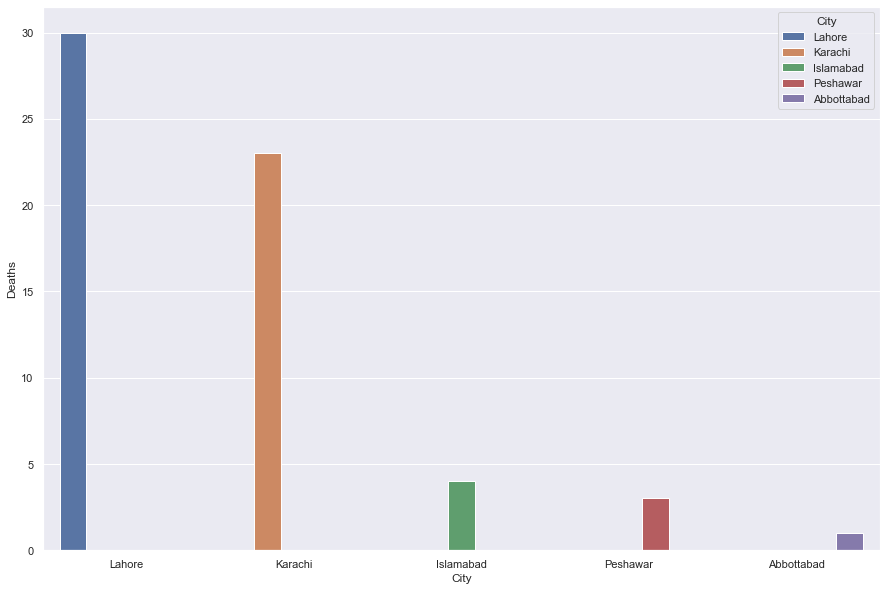

In [25]:
sns.set(rc = {"figure.figsize": (15,10)})
sns.barplot(x = 'City', y = 'Deaths', data = top_max_d, hue = 'City')
plt.show()

In [26]:
max_r = last_date.sort_values(by = "Recovered", ascending = False)


In [27]:
top_max_r = max_r.head()
top_max_r

,Date,Cases,Deaths,Recovered,Province,City
2652,2020-02-06,1149,23,948,Sindh,Karachi
2796,2020-02-06,1639,30,353,Punjab,Lahore
2609,2020-02-06,295,4,230,Islamabad Capital Territory,Islamabad
2778,2020-02-06,405,0,168,Baluchistan,Quetta
2653,2020-02-06,47,0,44,Sindh,Hyderabad


<AxesSubplot:xlabel='City', ylabel='Recovered'>

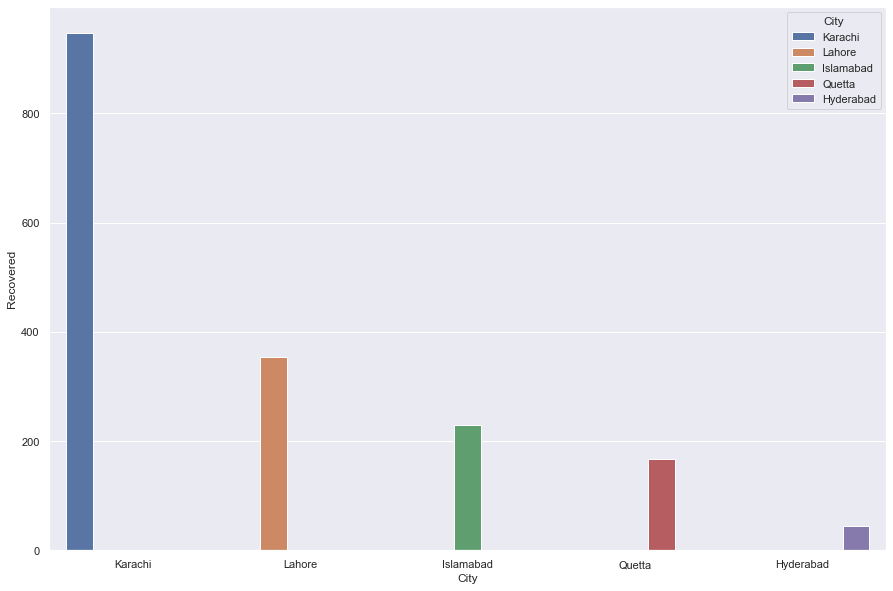

In [28]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.barplot(x = 'City', y = 'Recovered', data = top_max_r, hue = 'City')

In [29]:
laho = data[data["City"] ==  'Lahore']

In [30]:
laho

,Date,Cases,Deaths,Recovered,Province,City
18,2020-03-15,1,0,0,Punjab,Lahore
26,2020-03-16,1,0,0,Punjab,Lahore
35,2020-03-17,3,0,0,Punjab,Lahore
53,2020-03-19,8,0,0,Punjab,Lahore
64,2020-03-20,2,0,0,Punjab,Lahore
...,...,...,...,...,...,...
2793,2020-05-30,952,36,394,Punjab,Lahore
2794,2020-05-31,1184,22,120,Punjab,Lahore
2795,2020-01-06,1610,43,95,Punjab,Lahore
2796,2020-02-06,1639,30,353,Punjab,Lahore


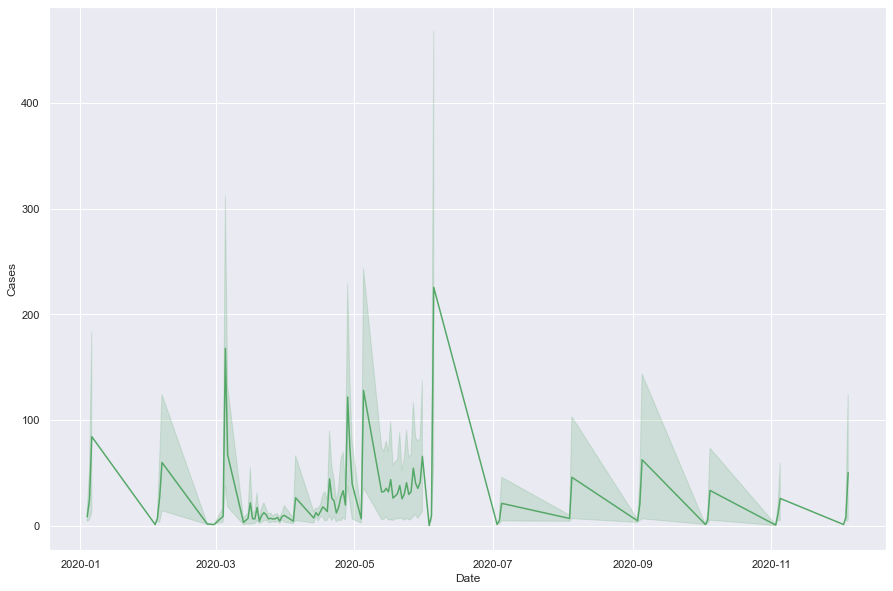

In [31]:
sns.set(rc = {"figure.figsize": (15, 10)})
sns.lineplot(x = "Date", y = 'Cases', data = data, color = "g")
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
y = data[["Deaths"]]
x = data[["Cases"]]


In [34]:
data.tail()

,Date,Cases,Deaths,Recovered,Province,City
2793,2020-05-30,952,36,394,Punjab,Lahore
2794,2020-05-31,1184,22,120,Punjab,Lahore
2795,2020-01-06,1610,43,95,Punjab,Lahore
2796,2020-02-06,1639,30,353,Punjab,Lahore
2797,2020-03-06,1615,37,243,Punjab,Lahore


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [36]:
y_test[:-5]

,Deaths
1769,0
2147,0
2705,0
911,0
1480,3
...,...
1259,0
1425,5
1883,0
680,0


In [37]:
x_train[:6]

,Cases
1292,49
2098,10
303,21
52,1
1954,7
965,0


In [38]:
lr = LinearRegression()

In [39]:
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
# y_pre = lr.predict([[200]])
y_pre = lr.predict(x_test)


In [41]:
y_pre[:5]

array([[0.11547818],
       [0.09771098],
       [0.09771098],
       [1.09267427],
       [0.87946785]])

In [42]:
y_test.head()

,Deaths
1769,0
2147,0
2705,0
911,0
1480,3


In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
mean_squared_error(y_test,y_pre)

1.5919249407005054


# MODEL 2


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
x = data[["Date"]]
y = data[["Cases"]]

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [48]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test[:5]

,Date
1769,2020-05-17
2147,2020-05-23
2705,2020-03-06
911,2020-04-22
1480,2020-11-05


In [49]:
lr2 = LinearRegression()

In [50]:
lr2.fit(x_train, y_train)

LinearRegression()

In [51]:
y_pre = lr2.predict(np.array([[2020-5-17]]))

In [61]:
y_pre

array([[599.18620495]])